In [1]:
import os
import pandas as pd
import supereeg as se
import numpy as np
import nibabel as nib
from nilearn import plotting as ni_plt
from nilearn.image import resample_img
from nilearn import datasets, image
import matplotlib.pyplot as plt
import matplotlib.colors as mplcol
import matplotlib as mpl
import seaborn as sns

In [2]:
n_nets = 7

In [3]:
network_dir = '../../paper/figs/source/networks'
fig_dir = '../../paper/figs/source/supplmental_3/networks'

if not os.path.exists(fig_dir):
    os.makedirs(fig_dir)
    
freq_fig_dir = '../../paper/figs/source/supplemental_3/freq'

In [4]:
nii_bo_dir = '../../data/niis'
networks_nii_bo_dir = os.path.join(nii_bo_dir, 'supplmental_3', 'networks')
if not os.path.exists(networks_nii_bo_dir):
    os.makedirs(networks_nii_bo_dir)
    
freq_nii_bo_dir = os.path.join(nii_bo_dir,'supplmental_3', 'freq')

In [5]:
yeo_colors = pd.read_fwf(os.path.join(network_dir, 'Yeo2011_' + str(n_nets) + 'Networks_ColorLUT.txt'))
yeo_colors.columns = ["inds", "networks", "x", "y", "z", "labels"]


In [6]:
if n_nets == 17:
    yeo_color_labels = ['visual peripheral', 'visual central', 'somatomotor A', 'somatomotor B', 'dorsal attention A', 
                        'dorsal attention B', 'ventral attention', 'salience', 'limbic A', 'limbic B', 'control C', 
                        'control A', 'control B', 'default D (auditory)', 'default C', 'default A', 'default B']
elif n_nets == 7:
    yeo_color_labels = ['Visual', 'Somatomotor', 'Dorsal Attention', 'Ventral Attention', 'Limbic ',
                        'Frontoparietal', 'Default']
    
yeo_colors['labels'] = yeo_color_labels

In [7]:
yeo_colors

,inds,networks,x,y,z,labels
0,1,7Networks_1,120,18,134,Visual
1,2,7Networks_2,70,130,180,Somatomotor
2,3,7Networks_3,0,118,14,Dorsal Attention
3,4,7Networks_4,196,58,250,Ventral Attention
4,5,7Networks_5,220,248,164,Limbic
5,6,7Networks_6,230,148,34,Frontoparietal
6,7,7Networks_7,205,62,78,Default


In [8]:
yeo_file = os.path.join(network_dir, 'Yeo2011_'+ str(n_nets) + 'Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz')
yeo = se.load(yeo_file)

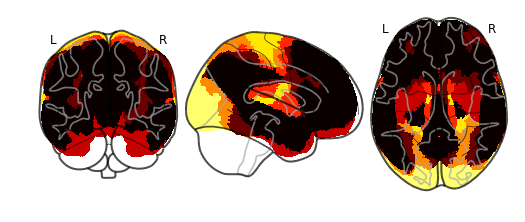

In [9]:
yeo.plot_glass_brain()

In [10]:
downsampled = 4
downsampled_nii = se.Nifti(resample_img(yeo, target_affine=np.eye(3)*downsampled, interpolation='nearest'))

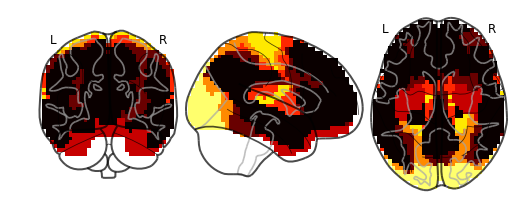

In [11]:
downsampled_nii.plot_glass_brain()

In [12]:
yeo_bo = se.Brain(downsampled_nii)

In [13]:
yeo_bo.save(os.path.join(networks_nii_bo_dir, 'yeo_bo.bo'))

In [14]:

color_stacked = np.array([])
for i in np.arange(0,n_nets+1):
    if color_stacked.shape[0]==0:
        color_stacked = yeo_colors[yeo_colors.inds==i][['x', 'y', 'z']].values
    else:
        color_stacked = np.vstack((color_stacked, yeo_colors[yeo_colors.inds==i][['x', 'y', 'z']].values))

In [15]:
color_stacked/255

array([[0.47058824, 0.07058824, 0.5254902 ],
       [0.2745098 , 0.50980392, 0.70588235],
       [0.        , 0.4627451 , 0.05490196],
       [0.76862745, 0.22745098, 0.98039216],
       [0.8627451 , 0.97254902, 0.64313725],
       [0.90196078, 0.58039216, 0.13333333],
       [0.80392157, 0.24313725, 0.30588235]])

In [16]:
magma_colors = np.array([[0.368733  , 0.002724  , 0.650601  ],
       [0.50022302, 0.01389304, 0.65714894],
       [0.6201179 , 0.09824851, 0.61470924],
       [0.86846771, 0.37314094, 0.39753518],
       [0.93002341, 0.47633225, 0.32375425],
       [0.97434661, 0.58904578, 0.24948002],
       [0.99401233, 0.70882914, 0.18102124]])

In [17]:
# data_vals = yeo_bo.get_data().values.tolist()
# color_all = np.array([])
# for i, v in enumerate(data_vals[0]):
#     if color_all.shape[0]==0:
#         color_all = yeo_colors[yeo_colors.inds==v][['x', 'y', 'z']].values
#     else:
#         color_all = np.vstack((color_all, yeo_colors[yeo_colors.inds==v][['x', 'y', 'z']].values))


In [18]:
### Just for 17! 
#magma_colors = color_stacked/255

In [19]:
magma_colors.shape

(7, 3)

In [20]:
data_vals = yeo_bo.get_data().values.tolist()
color_all = np.array([])
for i, v in enumerate(data_vals[0]):
    ind_color = int(v-1)
    if color_all.shape[0]==0:
        color_all = magma_colors[ind_color]
    else:
        color_all = np.vstack((color_all, magma_colors[ind_color]))


In [21]:
color_all.shape

(16457, 3)

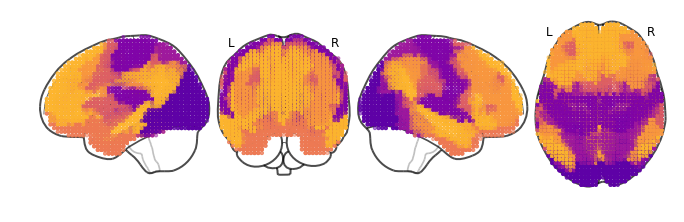

In [22]:
locs = yeo_bo.get_locs().as_matrix()
ni_plt.plot_connectome(np.eye(locs.shape[0]), locs, output_file=None,
                               node_kwargs={'alpha': 0.5, 'edgecolors': None},
                               node_size=10, node_color=color_all, display_mode='lyrz')



In [23]:
downsampled = 6
downsampled_nii = se.Nifti(resample_img(yeo, target_affine=np.eye(3)*downsampled, interpolation='nearest'))

In [24]:
yeo_bo = se.Brain(downsampled_nii)
yeo_bo.save(os.path.join(networks_nii_bo_dir, 'yeo_bo_6mm.bo'))

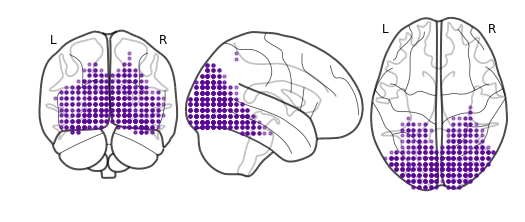

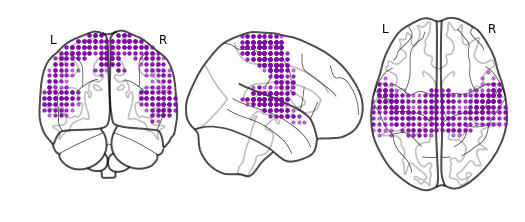

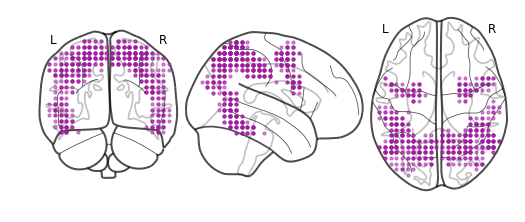

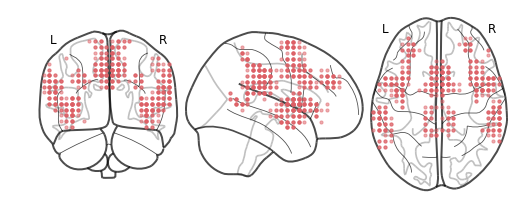

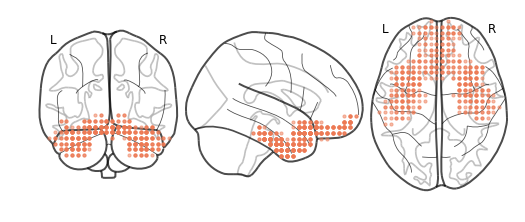

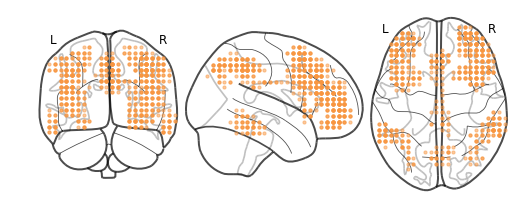

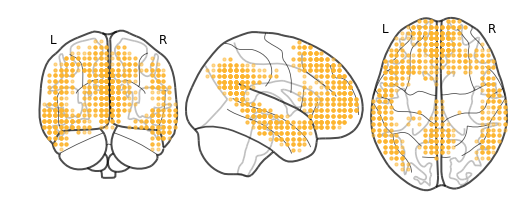

In [25]:
for n in np.arange(1, n_nets+1):
    mask_n = yeo_bo.get_data()==n
    masked_locs = yeo_bo.get_locs().as_matrix()[mask_n.as_matrix().ravel()]
    bo_n = se.Brain(data=np.atleast_2d(np.ones(masked_locs.shape[0])), locs=masked_locs)
    locs = bo_n.get_locs()
    colors = magma_colors[n-1]
    ni_plt.plot_connectome(np.eye(locs.shape[0]), locs, output_file=None,
                                   node_kwargs={'alpha': 0.5, 'edgecolors': None},
                                   node_size=10, node_color=colors)
    outfile = os.path.join(networks_nii_bo_dir, 'bo_network_' + str(n))
    bo_n.save(outfile)

In [26]:
yeo_nii = se.load(os.path.join(networks_nii_bo_dir, 'yeo_bo.bo'), return_type='nii')

In [27]:
try_bo = se.Brain(yeo_nii)

In [28]:
f = 'alpha'
freq_file = os.path.join(freq_nii_bo_dir, f + '_best.bo')
freq_bo = se.load(freq_file)
freq_nii = se.load(freq_file, return_type='nii')
mask = freq_nii.get_data() > 0
counts = np.array(np.unique(yeo_nii.get_data()[mask], return_counts=True))

OSError: ``../../data/niis/supplmental_3/freq/alpha_best.bo`` does not exist

In [ ]:
nets = counts[0][counts[0]>0]
counts = counts[1][counts[0]>0]

In [ ]:
yeo_nii.plot_glass_brain()

In [ ]:
mean_best_loc = pd.read_csv(os.path.join(freq_fig_dir, 'mean_best_loc.csv'))

In [ ]:
delta_mean = mean_best_loc[mean_best_loc['Freq']=='delta']['Corr'][0]

In [ ]:
mean_best_loc['Normed_corr'] = mean_best_loc['Corr']/delta_mean

In [ ]:
mean_best_loc

In [ ]:
mean_best_loc['Corr'].min()

In [ ]:
mean_best_loc['min_corr'] = mean_best_loc['Corr'] - mean_best_loc['Corr'].min()


In [ ]:
mean_best_loc['new_normed_corr'] = mean_best_loc['min_corr']/mean_best_loc['min_corr'].max() + .5

In [ ]:
freqs = ['delta', 'theta', 'alpha', 'beta', 'lgamma', 'hgamma']
for f in freqs:
    
    print(f)
    freq_file = os.path.join(freq_nii_bo_dir, f + '_best.bo')
    freq_nii = se.load(freq_file, return_type='nii')
    freq_nii.plot_glass_brain()
    mask = freq_nii.get_data() > 0
    counts = np.array(np.unique(yeo_nii.get_data()[mask], return_counts=True))
    
    copied = yeo_nii.get_data().copy()
    copied[mask + 0 == 0] = 0.
    temp_mask = se.Nifti(copied, yeo_nii.get_affine())
    temp_bo = se.Brain(temp_mask)
    
    outfile = os.path.join(networks_nii_bo_dir, f + '_network')
    temp_bo.save(outfile)
    
    data_vals = temp_bo.get_data().values.tolist()
    color_all = np.array([])
    for i, v in enumerate(data_vals[0]):
        ind_color = int(v-1)
        if color_all.shape[0]==0:
            color_all = magma_colors[ind_color]
        else:
            color_all = np.vstack((color_all, magma_colors[ind_color]))
        
            
    locs = temp_bo.get_locs().as_matrix()
    ni_plt.plot_connectome(np.eye(locs.shape[0]), locs, output_file=None,
                                   node_kwargs={'alpha': 0.5, 'edgecolors': None},
                                   node_size=10, node_color=color_all)


    ni_plt.show()
    
    nets = counts[0][counts[0]>0]
    counts = counts[1][counts[0]>0]
    
    pie_colors = np.array([])
    color_labels = []
            
    for c in nets:
    
        if pie_colors.shape[0]==0:
            pie_colors = magma_colors[int(c-1)]
            color_labels.append(yeo_colors[yeo_colors.inds==c]['labels'].values[0])
        else:
            pie_colors = np.vstack((pie_colors, magma_colors[int(c-1)]))
            color_labels.append(yeo_colors[yeo_colors.inds==c]['labels'].values[0])
    
    print(color_labels)
    
    #scale_pie = np.array(mean_best_loc[mean_best_loc['Freq']==f]['Normed_corr'])[0]
    scale_pie = np.array(mean_best_loc[mean_best_loc['Freq']==f]['new_normed_corr'])[0]
    
    print(scale_pie)
    size = 1
    
    fig = plt.figure(figsize=[10*scale_pie, 10*scale_pie])
    patches, texts = plt.pie(counts/counts.sum(), colors=sns.color_palette(pie_colors), radius=scale_pie, shadow=False, startangle=90, wedgeprops=dict(width=scale_pie, edgecolor='w'))
    #plt.legend(patches, color_labels, loc='upper left', bbox_to_anchor=(0.95, .45, 0.5, 0.5), fontsize = 'large')
    #plt.axis('equal')
    #plt.tight_layout()
    pie_outfile = os.path.join(fig_dir, f + '_network_pie.pdf')
    plt.savefig(pie_outfile)
    plt.show()   

In [ ]:
yeo_colors['labels'].values.tolist()

In [ ]:
#colors = list(color_stacked/255)
colors = magma_colors
f = lambda m,c: plt.plot([],[],marker=m, color=c, ls="none")[0]
handles = [f("s", colors[i]) for i in range(n_nets)]
labels = yeo_colors['labels'].values.tolist()
legend = plt.legend(handles, labels, loc=3, framealpha=1, frameon=False, fontsize = 'x-large')

def export_legend(legend, filename=os.path.join(fig_dir,'yeo_legend.pdf'), expand=[-1,-1,0,0]):
    fig  = legend.figure
    fig.canvas.draw()
    bbox  = legend.get_window_extent()
    bbox = bbox.from_extents(*(bbox.extents + np.array(expand)))
    bbox = bbox.transformed(fig.dpi_scale_trans.inverted())
    fig.savefig(filename, dpi="figure", bbox_inches=bbox)

export_legend(legend)
plt.show()